# Problema 2

_Carlos Manuel González Peña C411_ [cmglezpdev](https://github.com/cmglezpdev)

Minimizar el cansancio del participante con mayor cansancio al finalizar el acto sexual.

Para resolver este problema usamos metaheurísticas, específicamente la Optimización por Enjambre de Partículas, ya que es una forma potente de optimizar funciones. El conjunto de soluciones posibles corresponden al tiempo que se le asigna a cada postura durante el acto sexual respetando las restricciones del problema, y el valor de la función objetivo para esa solución sería el cansancio mínimo entre todos los cansancios finales de los participantes para esta solución.

# Metaheurística

En el módulo `meta.py` se encuentra la implementación de nuestra metaherística, así como una clase abtracta `Metaheuristics` que funciona como abtracción a cualquier metaheurística. Esta también tiene sus propios métodos para poder evaluar las metaheurísticas.

### Probando la metaheurística

Usando algunas funciones del módulo `bbob.py` y una implementación de un evaluador de metaheurísticas en `evaluation.py` podemos evaluar que tan correcta es nuestra implementación del __PSO__.


Test

BBOB sphere function instance:
  dim:    2
  x_opt:  [ 4.5600171 -2.9231819]
  f_opt:  114.38

Evaluating PSO

Evaluation of PSO:
  best result --------------- [4.0580498  1.06634129]
  success ------------------- True
  iters --------------------- 1
  evals --------------------- 72035
  time ---------------------- 0.331451416015625
  approx. evals per iter ---- 72035.0
  approx. iter time --------- 0.331451416015625


Error: 16.168266455071148


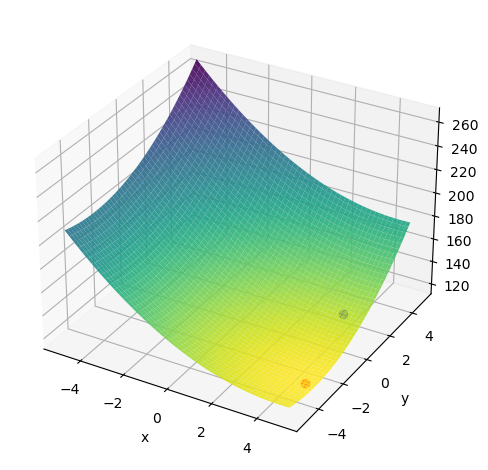


Test

BBOB ellipsodial function instance:
  dim:    2
  x_opt:  [ 4.5600171 -2.9231819]
  f_opt:  114.38

Evaluating PSO

Evaluation of PSO:
  best result --------------- [ 4.05879704 -1.15159268]
  success ------------------- True
  iters --------------------- 1
  evals --------------------- 72035
  time ---------------------- 1.6314353942871094
  approx. evals per iter ---- 72035.0
  approx. iter time --------- 1.6314353942871094


Error: 316.4697242362555


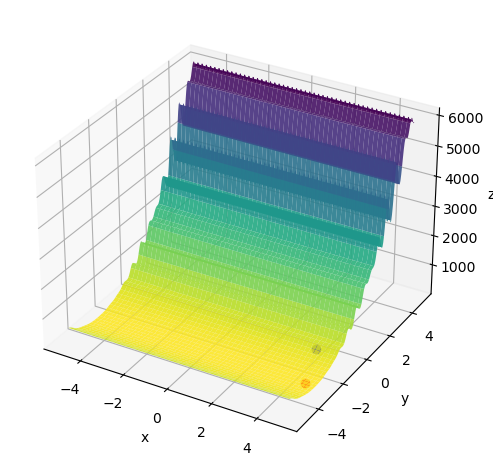


Test

BBOB rastrigin function instance:
  dim:    2
  x_opt:  [ 4.5600171 -2.9231819]
  f_opt:  114.38

Evaluating PSO

Evaluation of PSO:
  best result --------------- [ 3.82133682 -0.15083719]
  success ------------------- True
  iters --------------------- 1
  evals --------------------- 72035
  time ---------------------- 4.259075880050659
  approx. evals per iter ---- 72035.0
  approx. iter time --------- 4.259075880050659


Error: 179.71996262516842


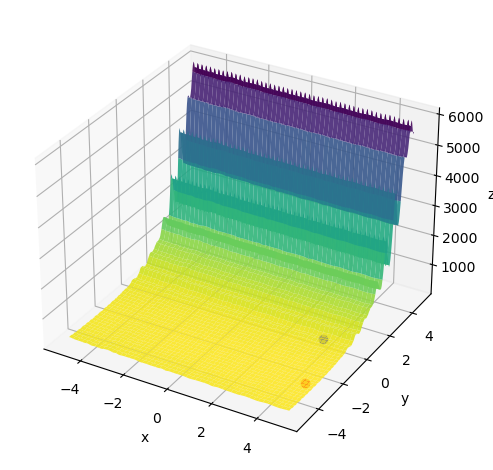


Test

BBOB buche-rastrigin function instance:
  dim:    2
  x_opt:  [ 4.5600171 -2.9231819]
  f_opt:  114.38

Evaluating PSO

Evaluation of PSO:
  best result --------------- [ 4.65261473 -0.18452112]
  success ------------------- True
  iters --------------------- 1
  evals --------------------- 72035
  time ---------------------- 2.859959602355957
  approx. evals per iter ---- 72035.0
  approx. iter time --------- 2.859959602355957


Error: 88.88988317256633


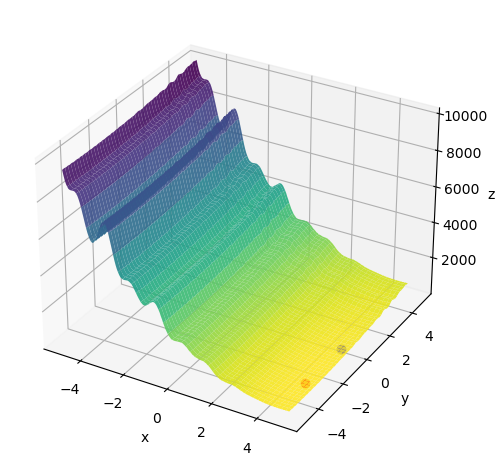


Test

BBOB linear slope function instance:
  dim:    2
  x_opt:  [ 5. -5.]
  f_opt:  114.38

Evaluating PSO

Evaluation of PSO:
  best result --------------- [5.         0.87689946]
  success ------------------- True
  iters --------------------- 1
  evals --------------------- 72035
  time ---------------------- 1.573270559310913
  approx. evals per iter ---- 72035.0
  approx. iter time --------- 1.573270559310913


Error: 58.76899457862061


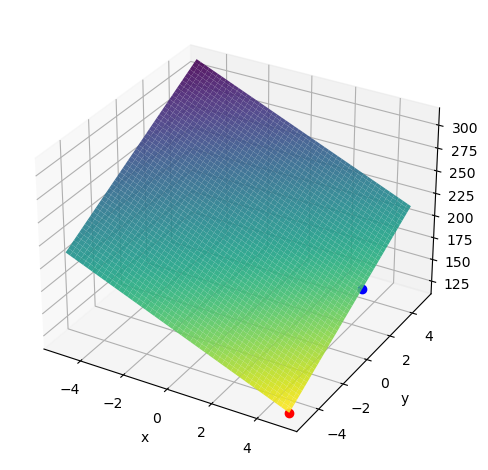

In [1]:
from evaluation import test_metaheuristic
from meta import PSO

test_metaheuristic(PSO(), sol_dim=2)

## Función de objetivo

La función objetivo se construye a partir de una función mas general que recibe todos los datos de nuestro problema.

In [2]:
import numpy as np

def get_fitness_funct(J: int, N: int, P0: np.array, E0: np.array, Pp: np.array, C: np.ndarray, P: np.ndarray):
    assert J == len(P0), "P0 must has length {J} but has {Z}" %(J, len(P0))
    assert J == len(E0), "E0 must has length {J} but has {Z}" %(J, len(E0))
    assert C.shape == (J, N), "C must has dimensions ({J}, {N}) but has {Z}" %(J, N, C.shape)
    
    def check_restrictions(x) -> bool:
        # restrictions
        def check_energy(x: np.array, J: int, N: int, P0: np.array, E0: np.array, Pp: np.array, C: np.ndarray, P: np.ndarray):
            # calcular la matriz de cansancio
            # tiredness = np.copy(E0)
            tiredness = np.copy(E0)
            for j in range(J):
                for i in range(N):
                    tiredness[j] -= x[j]*C[j][i]

            return tiredness.min() >= 0

        def check_pleasure(x: np.array, J: int, N: int, P0: np.array, E0: np.array, Pp: np.array, C: np.ndarray, P: np.ndarray):
            # calcular la matriz de cansancio
            # tiredness = np.copy(E0)
            pleasure = np.copy(E0)
            for j in range(J):
                for i in range(N):
                    pleasure[j] += x[j]*P[j][i]

            ok = True
            for j in range(J):
                ok = (ok and pleasure[j] >= Pp[j])
            return ok    
        
        return check_energy(x, J, N, P0, E0, Pp, C, P) and check_pleasure(x, J, N, P0, E0, Pp, C, P)        

    def fitness_func(x: np.array) -> float:
        assert len(x) == N, "x must has length {N} nust has {Z}" %(N, len(x))
        if not check_restrictions(x):
            return float('inf')
 
        # calcular el cansancio de todos los participantes
        tiredness = np.copy(E0)
        for j in range(J):
            for i in range(N):
                tiredness[j] -= x[j]*C[j][i]
            
        return tiredness.max()
    
    return fitness_func

## Resolución del ejercicio

Vamos a resolver un caso de nuestro problema, proporcionando los datos necesarios. Para esto vamos a tener 2 participantes en el acto sexual y 5 posturas.

In [11]:
J = 2 # cantidad de participantes
N = 5 # cantidad de posturas

P0 = np.array([15, 22]) # placer inicial por participante
E0 = np.array([20, 30]) # energía inicial por participante
Pp = np.array([18, 21]) # placer necesario para el orgasmo

# energía q consule el participante j en la postura i
C = np.array([
    [1, 3, 2, 2, 1],
    [2, 3, 2, 1, 3]
])

# placer q otorga la posicion i al participante j
P = np.array([
    [2, 4, 3, 2, 4],
    [1, 0, 4, 6, 3]
])
    

pso = PSO()
obj_func = get_fitness_funct(J, N, P0, E0, Pp, C, P)

(x, v) = pso.solve(obj_func, 5)

print(f"== Cansancio máximo alcanzado: {v} ==")
print("===== Distribución de tiempo entre posturas =====")
for i, p in enumerate(x):
    print(f"Tiempo en la postura {i+1}: {p}")

== Cansancio máximo alcanzado: 2 ==
===== Distribución de tiempo entre posturas =====
Tiempo en la postura 1: 1.9614720625836637
Tiempo en la postura 2: 2.573403335864907
Tiempo en la postura 3: 1.688924485793945
Tiempo en la postura 4: 2.2673056643407565
Tiempo en la postura 5: 0.3993884323746973
